1/8
{'temp_lost': 1}
2/8
{'temp_lost': 1}
3/8
{'temp_lost': 1}
4/8
{'temp_lost': 1}
5/8
{'temp_lost': 1}
6/8
{'temp_lost': 1}
7/8
{'temp_lost': 1}
8/8
{'temp_lost': 1}


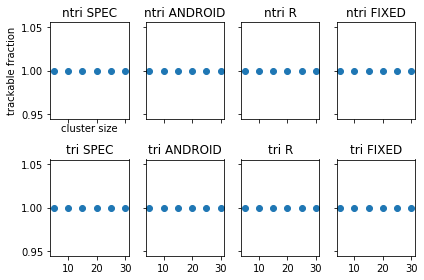

In [5]:
import gameoftrackers as got
import matplotlib.pyplot as plt
import numpy as np
import math
import pprint
from gameoftrackers import TimeSeriesData, ExposureNotificationTimers, ExposureNotificationTimerTypes, SIMULATION_RUN_STEPS, DeviceOwnerAgent, run_game, render_game, Map, action_list

n_types = len(list(ExposureNotificationTimerTypes))
n_total = n_types * 2
n_simulation_runs = 1
max_cluster = 26
i_total = 0
CLUSTER_STEP = 5

fig, ax = plt.subplots(2, n_types, sharex='all', sharey='all')
fig.set_tight_layout(True)

for timer_type in ExposureNotificationTimerTypes:
    for triangulated in [False, True]:
        trackables = []

        stats = {}
        for cluster_size in range(0, max_cluster, CLUSTER_STEP):

            trackables += [run_game(
                n_simulation_runs=n_simulation_runs,
                cluster_size=max_cluster,
                triangulated=triangulated,
                timer_type=timer_type
            )]

            for action in action_list:
                print(f"action {action[1]}")
                if not action[1] in stats:
                    stats[action[1]] = 0
                stats[action[1]] += 1

        axx = i_total % 2
        axy = timer_type.value - 1
        cax = ax[axx][axy]
        cax.cla()

        cax.set_title("{} {}".format(
            'tri' if triangulated else 'ntri',
            timer_type.name[timer_type.name.rfind('_') + 1:]
        ))

        data = np.array([
            [(i + 1) * CLUSTER_STEP, t]
            for i in range(len(trackables))
            for t in trackables[i]
        ])
        x = data[:,0]
        y = data[:,1]

        cax.scatter(x=x, y=y)
        if axx == 0 and axy == 0:
            cax.set_xlabel('cluster size')
            cax.set_ylabel('trackable fraction')

        i_total += 1
        print(f"{i_total}/{n_total}")
        pprint.pprint(stats)